In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv("E:\datascience\MACHINE LEARNING\EDA\IRIS.csv")

In [3]:
df=dataset

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.shape

(150, 5)

In [6]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [7]:
df.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### checking missing value

In [10]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

there is no null values in this dataset

### checking duplicates

In [11]:
data = df.drop_duplicates('species')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
100,6.3,3.3,6.0,2.5,Iris-virginica


In [12]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

We can see that there are only three unique species.

### checking outlier

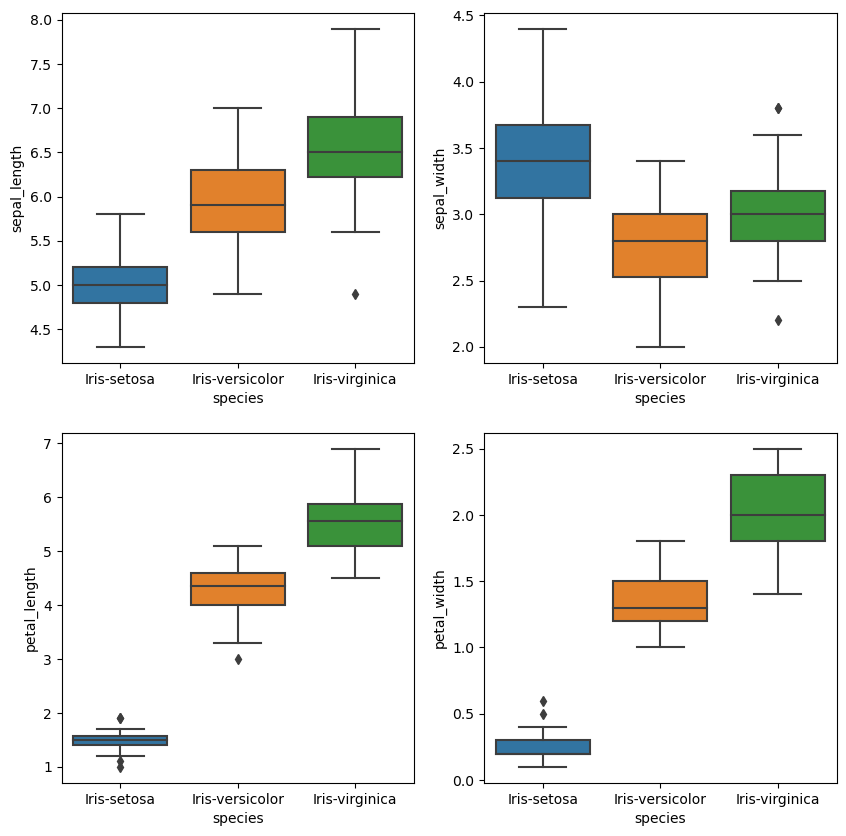

In [13]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(x='species',y=df['sepal_length'],data=df)

plt.subplot(2,2,2)
sns.boxplot(x='species',y=df['sepal_width'],data=df)

plt.subplot(2,2,3)
sns.boxplot(x='species',y=df['petal_length'],data=df)

plt.subplot(2,2,4)
sns.boxplot(x='species',y=df['petal_width'],data=df)

plt.show()

-Species Setosa has the smallest features and less distributed with some outliers.
-Species Versicolor has the average features.
-Species Virginica has the highest features

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning

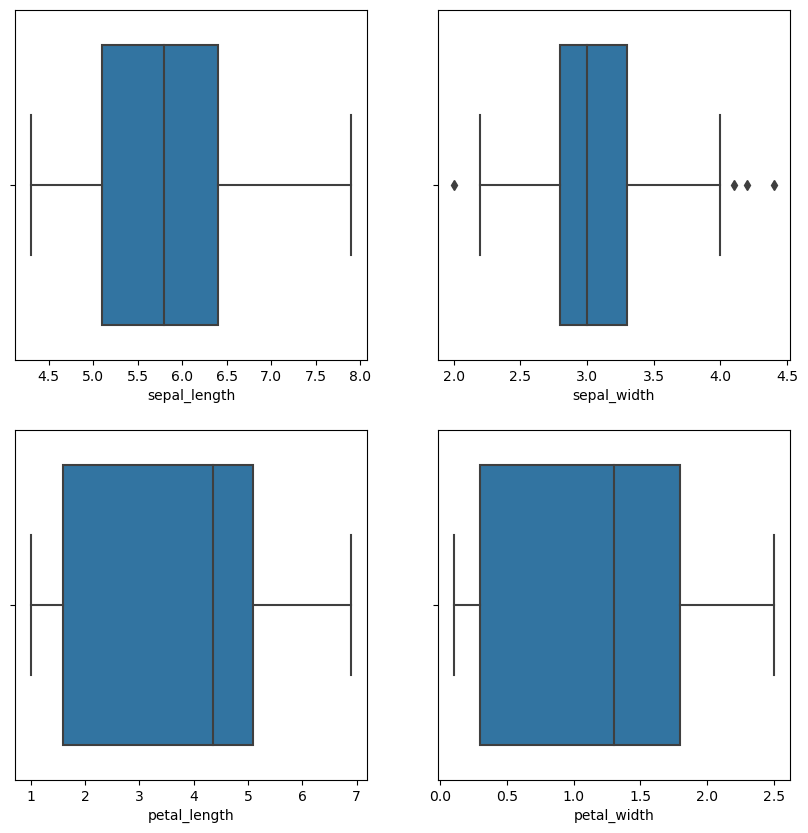

In [14]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(df['sepal_length'],data=df)

plt.subplot(2,2,2)
sns.boxplot(df['sepal_width'],data=df)

plt.subplot(2,2,3)
sns.boxplot(df['petal_length'],data=df)

plt.subplot(2,2,4)
sns.boxplot(df['petal_width'],data=df)

plt.show()

here we can we that sepal_width have some outlier so we can remove that outlier

### handling outlier

In [15]:
Q1=np.percentile(df['sepal_width'],25,interpolation='midpoint')
Q3=np.percentile(df['sepal_width'],75,interpolation='midpoint')

In [16]:
IQR=Q3-Q1

In [17]:
IQR

0.5

In [18]:
upperfence=Q3+(1.5*IQR)
lowerfence=Q1-(1.5*IQR)

In [19]:
upperfence

4.05

In [20]:
lowerfence

2.05

In [21]:
upper=np.where(df['sepal_width']>=upperfence)
upper

(array([15, 32, 33], dtype=int64),)

In [22]:
lower=np.where(df['sepal_width']<=lowerfence)
lower

(array([60], dtype=int64),)

In [23]:
df.drop(upper[0],inplace=True)
df.drop(lower[0],inplace=True)

In [24]:
df.shape

(146, 5)

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


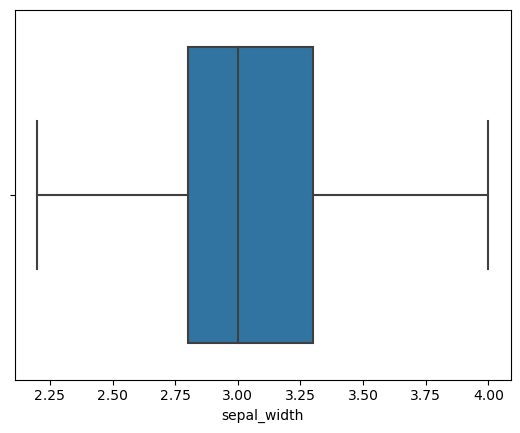

In [25]:
sns.boxplot(df['sepal_width'])
plt.show()

removing the outliers 4 points in dataset

### visualization

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

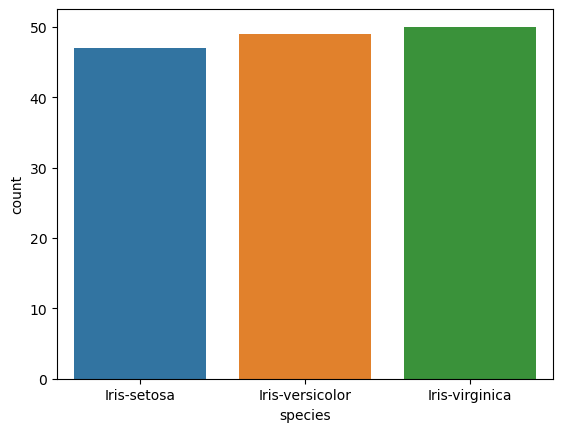

In [27]:
sns.countplot(x='species',data=df)
plt.show()

We will see the relationship between the sepal length and sepal width and also between petal length and petal width.

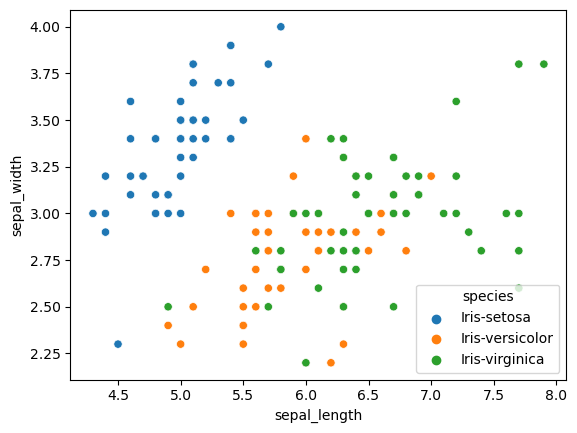

In [28]:
sns.scatterplot(x='sepal_length',y='sepal_width',hue='species',data=df)
plt.show()

-Species Setosa has smaller sepal lengths but larger sepal widths.
-Versicolor Species lies in the middle of the other two species in terms of sepal length and width
-Species Virginica has larger sepal lengths but smaller sepal widths.

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

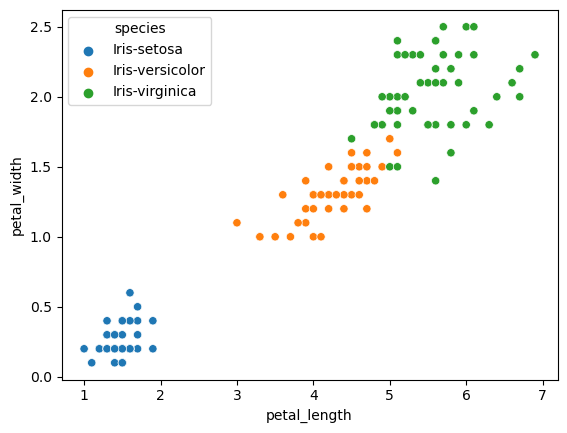

In [29]:
sns.scatterplot(x='petal_length',y='petal_width',hue='species',data=df)

-Species Setosa has smaller petal lengths and widths.
-Versicolor Species lies in the middle of the other two species in terms of petal length and width
-Species Virginica has the largest of petal lengths and widths.

In [30]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


[]

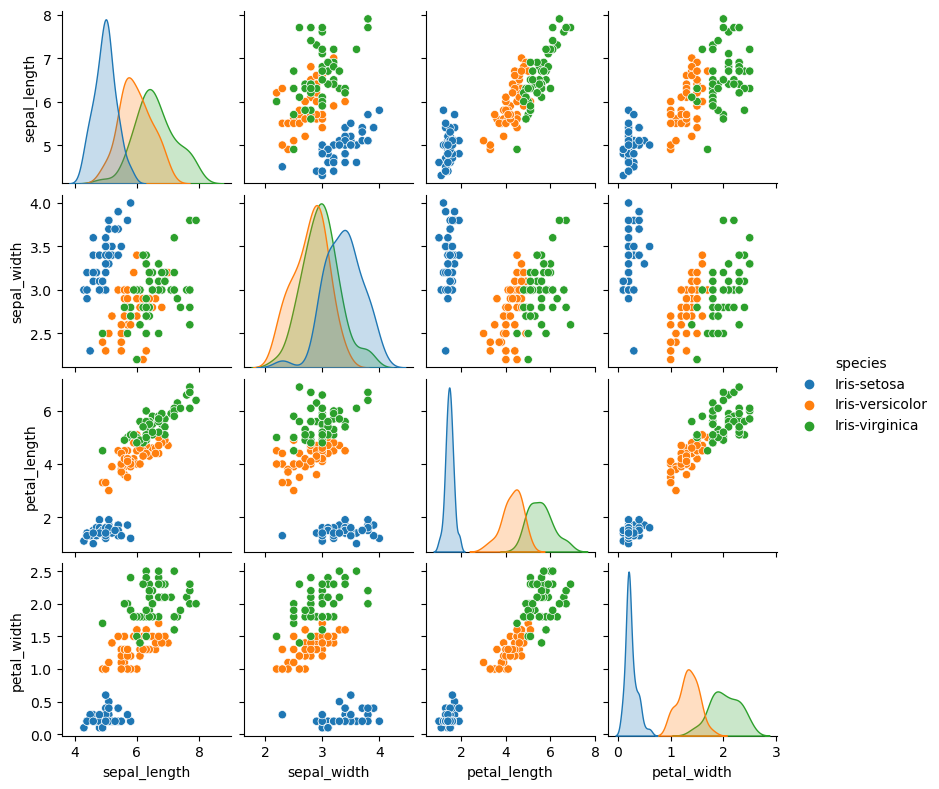

In [31]:
sns.pairplot(df,hue='species',height=2)
plt.plot()

### handling correlation

In [32]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.113977,0.879374,0.822577
sepal_width,-0.113977,1.000000,-0.397123,-0.329782
petal_length,0.879374,-0.397123,1.000000,0.961755
petal_width,0.822577,-0.329782,0.961755,1.000000


### heatmap

The heatmap is a data visualization technique that is used to analyze the dataset as colors in two dimensions.
Basically, it shows a correlation between all numerical variables in the dataset.

<AxesSubplot:>

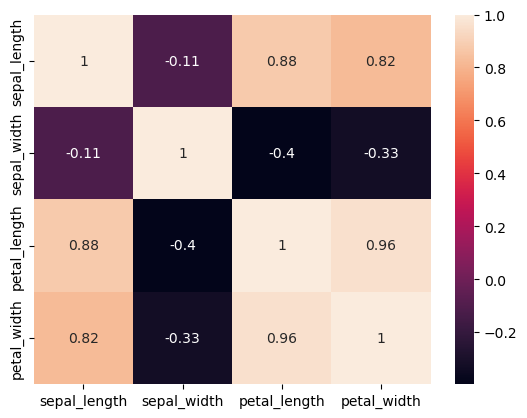

In [33]:
sns.heatmap(df.corr(),annot=True)

-Petal width and petal length have high correlations. 
-Petal length and sepal width have good correlations.
-Petal Width and Sepal length have good correlations.